In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
df=pd.read_csv("./dataset/INFY.csv",index_col='Date',parse_dates=True)

In [3]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,INFY,EQ,1333.80,1332.25,1351.30,1321.00,1345.00,1343.55,1343.19,7088606,9.521361e+14,130375.0,4218129.0,0.5951
2021-04-27,INFY,EQ,1343.55,1346.00,1353.00,1340.15,1347.50,1348.50,1346.89,3636115,4.897445e+14,145974.0,1871084.0,0.5146
2021-04-28,INFY,EQ,1348.50,1358.00,1359.50,1344.60,1355.80,1356.00,1353.45,4879234,6.603778e+14,137376.0,2857134.0,0.5856


In [4]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [5]:
numerical_data=df.select_dtypes(include=['float64','int64']).columns

In [6]:
categorical_data=df.select_dtypes(include=['object']).columns

In [7]:
df['Date']=df.index

In [8]:
start_date='2011-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

rate of return is defined as the closing value subtracted from the previos close value divided by previous close value multiplied by 100

Return=[(Close-Prev Close)/Prev Close]x100

In [9]:
df['return']=((df['Close']-df['Prev Close'])/df['Prev Close'])*100

In [10]:
df=df.loc[mask]

In [11]:
df=df.ffill()

In [12]:
df['return'].isnull().values.any()

False

In [13]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date,return
Date,,,,,,,,,,,,,,,,
2011-01-03,INFOSYSTCH,EQ,3442.75,3444.00,3469.70,3427.70,3462.45,3458.35,3448.24,631068,2.176074e+14,NaN,405296.0,0.6422,2011-01-03,0.453126
2011-01-04,INFOSYSTCH,EQ,3458.35,3457.00,3499.00,3457.00,3470.00,3481.45,3481.24,1014911,3.533147e+14,NaN,653567.0,0.6440,2011-01-04,0.667949
2011-01-05,INFOSYSTCH,EQ,3481.45,3465.00,3477.00,3445.10,3463.50,3459.60,3460.24,440395,1.523872e+14,NaN,249899.0,0.5674,2011-01-05,-0.627612
2011-01-06,INFOSYSTCH,EQ,3459.60,3480.00,3493.00,3444.10,3476.95,3478.15,3474.28,586480,2.037595e+14,NaN,298773.0,0.5094,2011-01-06,0.536189
2011-01-07,INFOSYSTCH,EQ,3478.15,3463.35,3495.00,3356.35,3371.10,3370.75,3420.32,1068866,3.655864e+14,NaN,695120.0,0.6503,2011-01-07,-3.087848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,INFY,EQ,1253.05,1249.90,1249.90,1226.00,1237.35,1236.05,1236.34,7313885,9.042416e+14,172066.0,2637421.0,0.3606,2020-12-24,-1.356690
2020-12-28,INFY,EQ,1236.05,1238.45,1248.00,1236.00,1239.45,1240.30,1240.58,4607051,5.715406e+14,123013.0,2098658.0,0.4555,2020-12-28,0.343837
2020-12-29,INFY,EQ,1240.30,1235.00,1254.45,1235.00,1249.85,1250.30,1246.33,6878105,8.572420e+14,132402.0,3219736.0,0.4681,2020-12-29,0.806257


In [14]:
df=df.drop(columns=['Date','Symbol','Series'])

In [15]:
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,return
Date,,,,,,,,,,,,,
2011-01-03,3442.75,3444.00,3469.70,3427.70,3462.45,3458.35,3448.24,631068,2.176074e+14,NaN,405296.0,0.6422,0.453126
2011-01-04,3458.35,3457.00,3499.00,3457.00,3470.00,3481.45,3481.24,1014911,3.533147e+14,NaN,653567.0,0.6440,0.667949
2011-01-05,3481.45,3465.00,3477.00,3445.10,3463.50,3459.60,3460.24,440395,1.523872e+14,NaN,249899.0,0.5674,-0.627612
2011-01-06,3459.60,3480.00,3493.00,3444.10,3476.95,3478.15,3474.28,586480,2.037595e+14,NaN,298773.0,0.5094,0.536189
2011-01-07,3478.15,3463.35,3495.00,3356.35,3371.10,3370.75,3420.32,1068866,3.655864e+14,NaN,695120.0,0.6503,-3.087848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1253.05,1249.90,1249.90,1226.00,1237.35,1236.05,1236.34,7313885,9.042416e+14,172066.0,2637421.0,0.3606,-1.356690
2020-12-28,1236.05,1238.45,1248.00,1236.00,1239.45,1240.30,1240.58,4607051,5.715406e+14,123013.0,2098658.0,0.4555,0.343837
2020-12-29,1240.30,1235.00,1254.45,1235.00,1249.85,1250.30,1246.33,6878105,8.572420e+14,132402.0,3219736.0,0.4681,0.806257


In [16]:
df.dropna(inplace=True)

<AxesSubplot:>

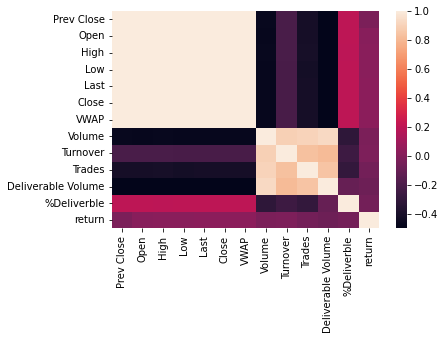

In [17]:
sn.heatmap(df.corr())

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
df=df.asfreq('B')
df.index

DatetimeIndex(['2011-06-01', '2011-06-02', '2011-06-03', '2011-06-06',
               '2011-06-07', '2011-06-08', '2011-06-09', '2011-06-10',
               '2011-06-13', '2011-06-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=2502, freq='B')

In [20]:
df=df.ffill(axis=0)
df['return'].isnull().values.any()

False

In [21]:
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,return
Date,,,,,,,,,,,,,
2011-06-01,2785.65,2794.00,2824.00,2784.00,2811.95,2811.55,2804.92,1013233.0,2.842039e+14,43496.0,721930.0,0.7125,0.929765
2011-06-02,2811.55,2780.00,2820.00,2777.00,2800.00,2803.05,2800.74,889661.0,2.491709e+14,42236.0,574357.0,0.6456,-0.302324
2011-06-03,2803.05,2811.00,2842.80,2810.90,2818.70,2816.20,2825.76,786673.0,2.222950e+14,38309.0,383569.0,0.4876,0.469132
2011-06-06,2816.20,2822.00,2845.95,2795.15,2845.00,2837.90,2822.59,471158.0,1.329888e+14,19078.0,304416.0,0.6461,0.770542
2011-06-07,2837.90,2830.05,2904.00,2830.05,2889.60,2892.55,2878.65,997333.0,2.870973e+14,50165.0,570484.0,0.5720,1.925720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,1253.05,1249.90,1249.90,1226.00,1237.35,1236.05,1236.34,7313885.0,9.042416e+14,172066.0,2637421.0,0.3606,-1.356690
2020-12-28,1236.05,1238.45,1248.00,1236.00,1239.45,1240.30,1240.58,4607051.0,5.715406e+14,123013.0,2098658.0,0.4555,0.343837
2020-12-29,1240.30,1235.00,1254.45,1235.00,1249.85,1250.30,1246.33,6878105.0,8.572420e+14,132402.0,3219736.0,0.4681,0.806257


In [22]:
train=df.iloc[:2250,12]
test=df.iloc[2250:,12]

In [23]:
Decomp_results=seasonal_decompose(df['return'])

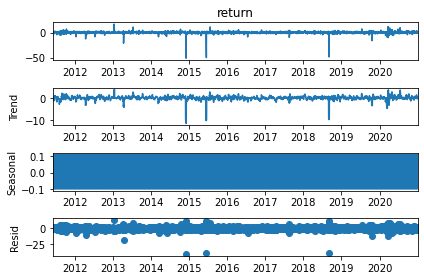

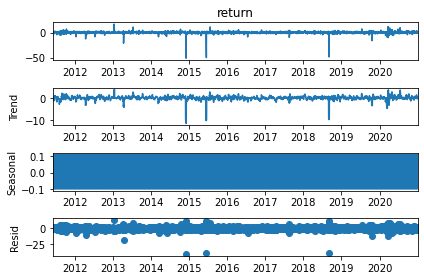

In [24]:
Decomp_results.plot()

In [25]:
exo=df.iloc[:,:11]
exo_train=exo.iloc[:2250]
exo_test=exo.iloc[2250:]


In [26]:
exo=exo.asfreq('B')

In [27]:
exo.ffill()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume
Date,,,,,,,,,,,
2011-06-01,2785.65,2794.00,2824.00,2784.00,2811.95,2811.55,2804.92,1013233.0,2.842039e+14,43496.0,721930.0
2011-06-02,2811.55,2780.00,2820.00,2777.00,2800.00,2803.05,2800.74,889661.0,2.491709e+14,42236.0,574357.0
2011-06-03,2803.05,2811.00,2842.80,2810.90,2818.70,2816.20,2825.76,786673.0,2.222950e+14,38309.0,383569.0
2011-06-06,2816.20,2822.00,2845.95,2795.15,2845.00,2837.90,2822.59,471158.0,1.329888e+14,19078.0,304416.0
2011-06-07,2837.90,2830.05,2904.00,2830.05,2889.60,2892.55,2878.65,997333.0,2.870973e+14,50165.0,570484.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,1253.05,1249.90,1249.90,1226.00,1237.35,1236.05,1236.34,7313885.0,9.042416e+14,172066.0,2637421.0
2020-12-28,1236.05,1238.45,1248.00,1236.00,1239.45,1240.30,1240.58,4607051.0,5.715406e+14,123013.0,2098658.0
2020-12-29,1240.30,1235.00,1254.45,1235.00,1249.85,1250.30,1246.33,6878105.0,8.572420e+14,132402.0,3219736.0


In [28]:
exo=np.nan_to_num(exo)

In [29]:
from pmdarima import auto_arima

In [30]:
auto_arima(df['return'],exogenous=exo,m=1,trace=True,D=1).summary()


Performing stepwise search to minimize aic


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8004.226, Time=3.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7996.222, Time=2.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7997.991, Time=2.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7998.000, Time=2.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=25074.575, Time=1.79 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=8000.354, Time=3.39 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 15.311 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2502
Model:                        SARIMAX   Log Likelihood               -3985.111
Date:                Sat, 04 Jun 2022   AIC                           7996.222
Time:                        14:18:25   BIC                           8071.945
Sample:                             0   HQIC                          8023.712
                               - 2502                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0451        nan        nan        nan         nan         nan
x1            -0.0324   8.71e-30  -3.72e+27      0.000      -0.032      -0.032
x2            -0.0114   6.61e-30  -1.72e+27      0.000      -0.011      -0.011
x3             0.0013   6.75e-30   1.94e+26      0.000       0.001       0.001
x4             0.0036   6.39e-30   5.68e+26      0.000       0.004       0.004
x5            -0.0046   6.54e-30  -7.08e+26      0.000      -0.005      -0.005
x6             0.0557   6.55e-30   8.51e+27      0.000       0.056       0.056
x7            -0.0123   6.57e-30  -1.87e+27      0.000      -0.012      -0.012
x8          7.816e-08   1.85e-25   4.22e+17      0.000    7.82e-08    7.82e-08
x9          4.109e-16    1.5e-17     27.340      0.000    3.81e-16     4.4e-16
x10        -9.166e-07   3.29e-27  -2.78e+20      0.000   -9.17e-07   -9.17e-07
x11        -1.875e-07   9.94e-26  -1.89e+18      0.000   -1.87e-07   -1.87e-07
sigma2         1.4158   1.26e-32   1.12e+32      0.000       1.416       1.416
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):           2741344.31
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):              11.95   Skew:                            -3.43
Prob(H) (two-sided):                  0.00   Kurtosis:                       165.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.5e+59. Standard errors may be unstable.
"""

In [31]:
import statsmodels.api as sm

In [32]:
model=sm.tsa.arima.ARIMA(train,exog=exo_train,order=(0,0,0))

Model=model.fit()

Model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 return   No. Observations:                 2250
Model:                          ARIMA   Log Likelihood              -10990.319
Date:                Sat, 04 Jun 2022   AIC                          22006.639
Time:                        14:18:27   BIC                          22080.981
Sample:                    06-01-2011   HQIC                         22033.773
                         - 01-14-2020                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0001        nan        nan        nan         nan         nan
Prev Close            -0.0321   1.87e-26  -1.71e+24      0.000      -0.032      -0.032
Open                  -0.0092   1.35e-26  -6.79e+23      0.000      -0.009      -0.009
High                  -0.0006   1.38e-26  -4.64e+22      0.000      -0.001      -0.001
Low                    0.0029   1.31e-26    2.2e+23      0.000       0.003       0.003
Last                  -0.0009   1.34e-26  -6.88e+22      0.000      -0.001      -0.001
Close                  0.0465   1.34e-26   3.47e+24      0.000       0.047       0.047
VWAP                  -0.0066   1.34e-26  -4.88e+23      0.000      -0.007      -0.007
Volume              2.203e-08      4e-22   5.51e+13      0.000     2.2e-08     2.2e-08
Turnover             4.44e-16   3.22e-14      0.014      0.989   -6.26e-14    6.35e-14
Trades             -1.916e-07   7.13e-24  -2.69e+16      0.000   -1.92e-07   -1.92e-07
Deliverable Volume -1.204e-07   2.26e-22  -5.33e+14      0.000    -1.2e-07    -1.2e-07
sigma2              2781.7936   1.47e-32   1.89e+35      0.000    2781.794    2781.794
===================================================================================
Ljung-Box (L1) (Q):                   2.83   Jarque-Bera (JB):           4806060.36
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):              16.80   Skew:                            -5.14
Prob(H) (two-sided):                  0.00   Kurtosis:                       229.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.14e+62. Standard errors may be unstable.
"""

In [33]:
start_len=len(train)
end_len=len(train)+len(test)-1

pred=Model.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')
print(pred)

2020-01-15   -0.341312
2020-01-16   -0.056588
2020-01-17   -0.005967
2020-01-20   -0.040700
2020-01-21   -0.356543
                ...   
2020-12-25   -0.474847
2020-12-28    0.240975
2020-12-29    0.587606
2020-12-30   -0.078046
2020-12-31    0.502724
Freq: B, Name: predicted_mean, Length: 252, dtype: float64


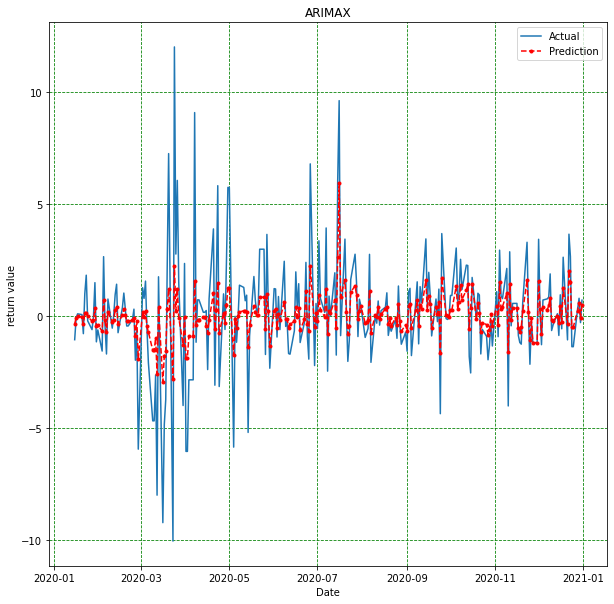

In [34]:
plt.figure(figsize=(10,10))
plt.plot(pred.index,test,label='Actual')
plt.plot(pred,label='Prediction',marker='.',linestyle='dashed',color='red')
plt.title('ARIMAX')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

In [35]:
import math
test=np.nan_to_num(test)
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(test,pred))
print(rmse)

1.790059394301555


In [36]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(test,pred)
print(error)

1.1471542674859225


In [37]:
print('test mean')
test.mean()


test mean


0.19588734413593448

In [38]:
print('prediction mean')
pred.mean()

prediction mean


0.06360465449359566

In [39]:
from sklearn.metrics import r2_score
r2_score(test,pred)

0.516746650521933